<a href="https://colab.research.google.com/github/karanrajagopalan/Other-stuffs/blob/main/Testnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# This is a notebook / python notebook / jupyter notebook.

You can have code, documentation and results/execution of code step by step in a notebook


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("https://www.stats.govt.nz/assets/Uploads/International-migration/International-migration-September-2023/Download-data/international-migration-september-2023-citizenship-by-visa-by-country-of-last-permanent-residence.csv", delimiter=',') # Reading CSV for a web hosted place, you can give a local csv file as well.
df.head() # Displaying top 5 rows

,year_month,month_of_release,passenger_type,direction,citizenship,visa,country_of_residence,estimate,standard_error,status
0,2001-09,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final
1,2002-03,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,3,0,Final
2,2005-01,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,5,0,Final
3,2005-04,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final
4,2005-07,2020-09,Long-term migrant,Arrivals,NZ,NZ and Australian citizens,Afghanistan,1,0,Final


In [ ]:
print(len(df)) # Number of rows in the csv
print(df.columns) # Column names in csv

324035
Index(['year_month', 'month_of_release', 'passenger_type', 'direction',
       'citizenship', 'visa', 'country_of_residence', 'estimate',
       'standard_error', 'status'],
      dtype='object')


In [ ]:
gp_df = df.groupby(["country_of_residence"]).sum().reset_index()  #groupby in pandas library, aftergroup it automatically aissigns the columns by which you have grouped by in the index, I'm resetting the Index so the country of residence becomes a column again
print(gp_df)
gp_df = gp_df.sort_values(by=["estimate"],ascending=False)
gp_df.head(20) #displaying top 20

                                  country_of_residence  estimate  \
0                                          Afghanistan     13610   
1                           Africa and the Middle East    769187   
2                                              Albania       551   
3                                              Algeria       823   
4                                              Andorra       276   
..                                                 ...       ...   
245                                     Western Sahara        16   
246                                              Yemen       649   
247  Yugoslavia (to Aug 2003), Serbia and Montenegr...       908   
248                                             Zambia      3742   
249                                           Zimbabwe     34094   

     standard_error  
0                60  
1              1972  
2                42  
3                31  
4                25  
..              ...  
245               0  
246    

<ipython-input-38-ebd5a23a7bd4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gp_df = df.groupby(["country_of_residence"]).sum().reset_index()


,country_of_residence,estimate,standard_error
214,TOTAL,11011118,19126
12,Asia,3698848,9933
165,Oceania and Antarctica,2619415,6197
71,Europe,1968669,2865
13,Australia,1781264,3786
233,United Kingdom,1318355,1398
164,Not Stated,1147570,2811
43,"China, People's Republic of",972150,3524
100,India,888691,4027
219,The Americas,807445,2675


In [ ]:
gp_df_no_total = gp_df.iloc[1:-1] # Except the first record which is Total in this table / dataframe
print(gp_df_no_total.head())

       country_of_residence  estimate  standard_error
12                     Asia   3698848            9933
165  Oceania and Antarctica   2619415            6197
71                   Europe   1968669            2865
13                Australia   1781264            3786
233          United Kingdom   1318355            1398


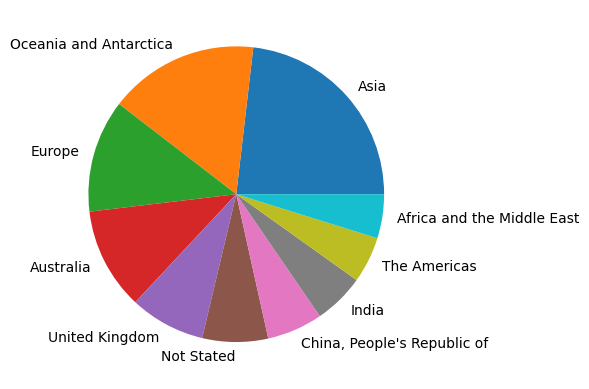

In [ ]:
plot1 = plt.pie(gp_df_no_total["estimate"].iloc[0:10],labels=gp_df_no_total["country_of_residence"].iloc[0:10]) # Plotting the top 20 nations in a pie chart